### Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data Loading

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
data = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

### Data readme

In [4]:
print('Data Obs : {}' .format(len(data)))
print('Data Columns : {} features' .format(len(data.columns)))
print('Data Columns : {}' .format(list(data.columns)))

Data Obs : 506
Data Columns : 14 features
Data Columns : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### Data Head

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Describe

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### data Correlation

In [7]:
corr = data.corr().round(2)

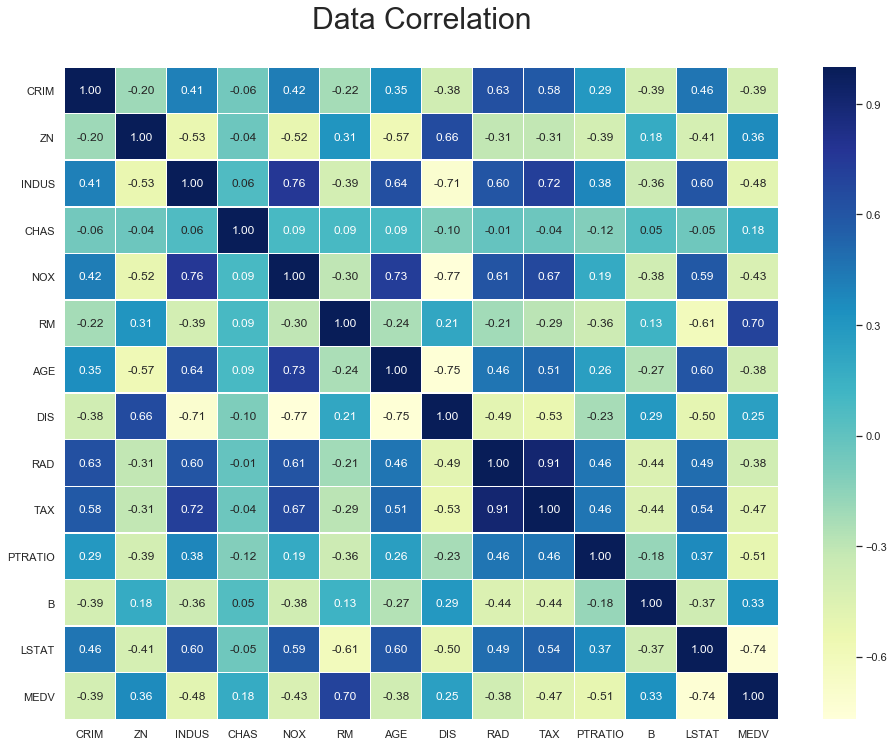

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16,12))
plt.title("Data Correlation", fontsize=30, position=(0.5, 1.0+0.05))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='YlGnBu')
plt.show()

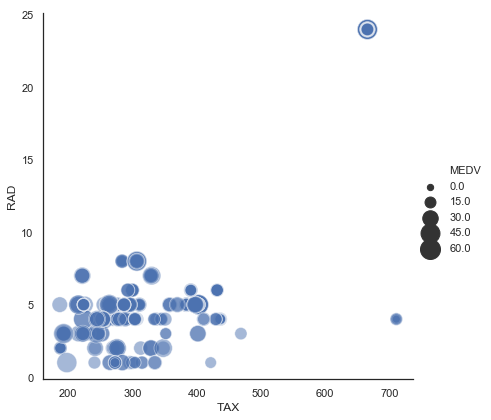

In [9]:
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="TAX", y="RAD", size="MEDV",
            sizes=(40, 400), alpha=.5, palette="cmap",
            height=6, data=data)
plt.show()

In [10]:
data[data['TAX'] < 600].corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.292718,0.551030,0.134326,0.756747,-0.220555,0.479357,-0.457143,0.144810,0.388100,-0.234556,-0.523279,0.402699,-0.181534
ZN,-0.292718,1.000000,-0.477386,-0.060212,-0.471940,0.308619,-0.528450,0.633651,-0.171166,-0.108463,-0.295556,0.127976,-0.390839,0.320577
INDUS,0.551030,-0.477386,1.000000,0.126703,0.674646,-0.371408,0.533660,-0.596369,0.007189,0.415502,0.099695,-0.302690,0.509791,-0.360261
CHAS,0.134326,-0.060212,0.126703,1.000000,0.125781,0.043789,0.128451,-0.142665,0.086933,-0.035493,-0.142621,-0.058096,0.061360,0.091612
NOX,0.756747,-0.471940,0.674646,0.125781,1.000000,-0.263575,0.667190,-0.711938,0.130075,0.387004,-0.168046,-0.410883,0.492296,-0.250309
RM,-0.220555,0.308619,-0.371408,0.043789,-0.263575,1.000000,-0.162839,0.088672,0.067212,-0.227039,-0.334022,0.155154,-0.677851,0.889269
AGE,0.479357,-0.528450,0.533660,0.128451,0.667190,-0.162839,1.000000,-0.672493,0.101417,0.241146,0.045925,-0.221078,0.540045,-0.250720
DIS,-0.457143,0.633651,-0.596369,-0.142665,-0.711938,0.088672,-0.672493,1.000000,-0.087367,-0.208469,0.019900,0.202948,-0.348329,0.049400
RAD,0.144810,-0.171166,0.007189,0.086933,0.130075,0.067212,0.101417,-0.087367,1.000000,0.249757,-0.054362,-0.059954,0.005308,0.070698
TAX,0.388100,-0.108463,0.415502,-0.035493,0.387004,-0.227039,0.241146,-0.208469,0.249757,1.000000,0.001881,-0.255032,0.252450,-0.292318


In [11]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


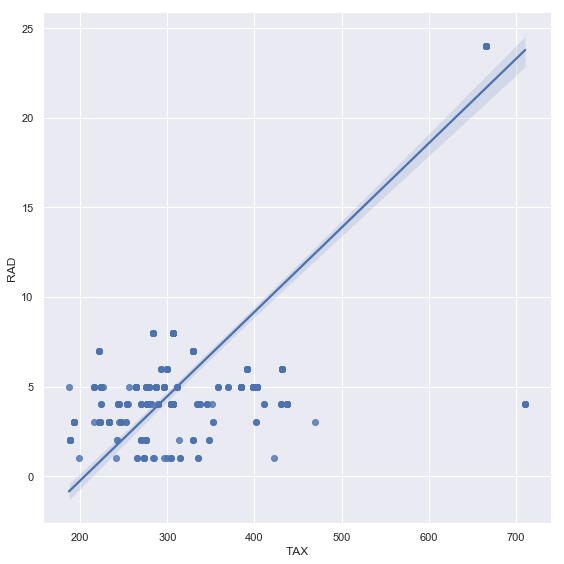

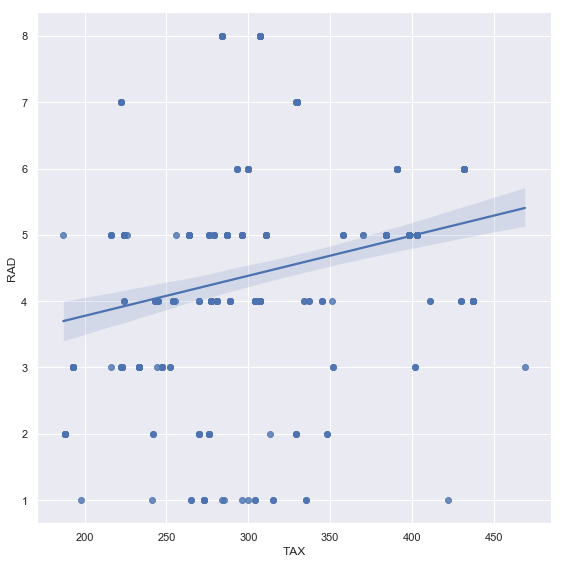

In [12]:
import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
sns.lmplot(x="TAX", y="RAD",truncate=True, height=8, data=data)
sns.lmplot(x="TAX", y="RAD",truncate=True, height=8, data=data[data['TAX'] < 600])



plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


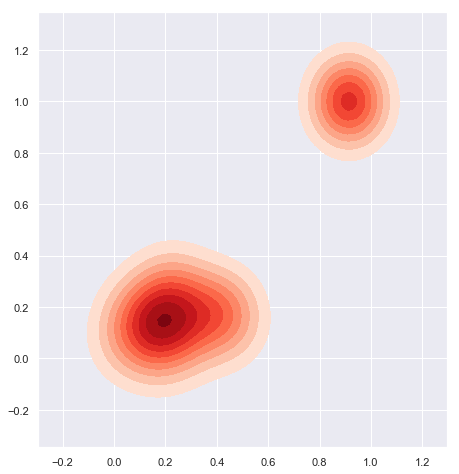

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = data[['TAX', "RAD"]]
sc = scaler.fit(data)
data_sc = sc.transform(data)

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(data_sc[:,0], data_sc[:,1],cmap="Reds", shade=True, shade_lowest=False)
# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

In [ ]:
setosa.sepal_length

In [19]:
data_sc[:, 0]

array([0.20801527, 0.10496183, 0.10496183, 0.06679389, 0.06679389,
       0.06679389, 0.23664122, 0.23664122, 0.23664122, 0.23664122,
       0.23664122, 0.23664122, 0.23664122, 0.22900763, 0.22900763,
       0.22900763, 0.22900763, 0.22900763, 0.22900763, 0.22900763,
       0.22900763, 0.22900763, 0.22900763, 0.22900763, 0.22900763,
       0.22900763, 0.22900763, 0.22900763, 0.22900763, 0.22900763,
       0.22900763, 0.22900763, 0.22900763, 0.22900763, 0.22900763,
       0.17557252, 0.17557252, 0.17557252, 0.17557252, 0.1240458 ,
       0.1240458 , 0.08778626, 0.08778626, 0.08778626, 0.08778626,
       0.08778626, 0.08778626, 0.08778626, 0.08778626, 0.08778626,
       0.10687023, 0.10687023, 0.10687023, 0.10687023, 0.53816794,
       0.07442748, 0.24045802, 0.13167939, 0.1851145 , 0.1851145 ,
       0.1851145 , 0.1851145 , 0.1851145 , 0.1851145 , 0.05534351,
       0.28625954, 0.28625954, 0.30152672, 0.30152672, 0.30152672,
       0.22519084, 0.22519084, 0.22519084, 0.22519084, 0.40267